In [2]:
#Importo Librerías a utilizar
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Conectamos a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [6]:
#Cargo e inspecciono el DataSet

df_DatosExamenes = pd.read_csv('FactoresDeRendimientoEnExamenes.csv')
df_DatosExamenes.head()

,Horas_Estudio,Asistencia,Involucramiento_Padres,Nivel_Recursos,Actividades_Extracurriculares,Horas_Suenio,Notas_Previas,Nivel_Motivacion,Acceso_Internet,Clases_con_Tutor,Ingresos_Familiares,Calidad_Docente,Tipo_Escuela,Influencia_de_Pares,Actividad_Fisica,Dificultades_Aprendizaje,Nivel_Educacion_Padres,Distancia_Escuela,Sexo,Nota_Examen
0,23,84,Bajo,Alto,No,7,73,Bajo,Si,0,Bajo,Medio,Publico,Positivo,3,No,Secundario,Cerca,Masculino,67
1,19,64,Bajo,Medio,No,8,59,Bajo,Si,2,Medio,Medio,Publico,Negativo,4,No,Universitario,Medio,Femenino,61
2,24,98,Medio,Medio,Si,7,91,Medio,Si,2,Medio,Medio,Publico,Neutral,4,No,Posgrado,Cerca,Masculino,74
3,29,89,Bajo,Medio,Si,8,98,Medio,Si,1,Medio,Medio,Publico,Negativo,4,No,Secundario,Medio,Masculino,71
4,19,92,Medio,Medio,Si,6,65,Medio,Si,3,Medio,Alto,Publico,Neutral,4,No,Universitario,Cerca,Femenino,70


In [7]:
df_DatosExamenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Horas_Estudio                  6607 non-null   int64 
 1   Asistencia                     6607 non-null   int64 
 2   Involucramiento_Padres         6607 non-null   object
 3   Nivel_Recursos                 6607 non-null   object
 4   Actividades_Extracurriculares  6607 non-null   object
 5   Horas_Suenio                   6607 non-null   int64 
 6   Notas_Previas                  6607 non-null   int64 
 7   Nivel_Motivacion               6607 non-null   object
 8   Acceso_Internet                6607 non-null   object
 9   Clases_con_Tutor               6607 non-null   int64 
 10  Ingresos_Familiares            6607 non-null   object
 11  Calidad_Docente                6529 non-null   object
 12  Tipo_Escuela                   6607 non-null   object
 13  Inf

In [8]:
df_DatosExamenes.describe()

,Horas_Estudio,Asistencia,Horas_Suenio,Notas_Previas,Clases_con_Tutor,Actividad_Fisica,Nota_Examen
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
#Creo una nueva columna
#Calificación Alta: 1 si es mayor a 65, 0 sino 0

df_DatosExamenes['Nota_Alta_Examen'] = np.where(df_DatosExamenes['Nota_Examen'] > 60, 'Nota Alta', 'Nota Baja')

In [11]:
df_DatosExamenes['Nota_Alta_Examen'].describe()

,Nota_Alta_Examen
count,6607
unique,2
top,Nota Alta
freq,6462


Text(0, 0.5, 'Frecuencia')

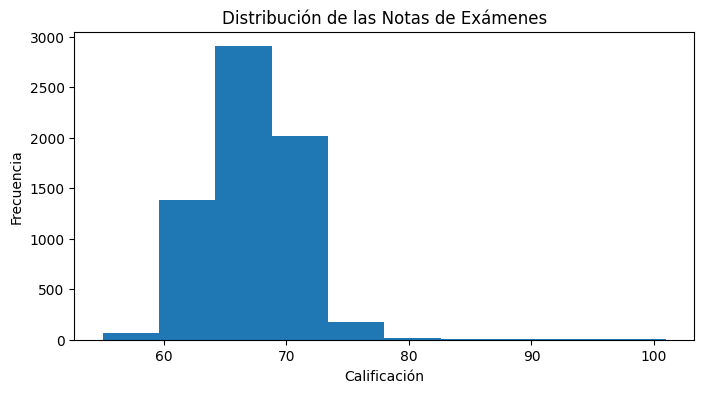

In [12]:
#Grafico la distribución de las notas de los alumnos
fig, axes = plt.subplots(figsize=(8, 4))
axes.hist(df_DatosExamenes['Nota_Examen'])
axes.set_title('Distribución de las Notas de Exámenes')
axes.set_xlabel('Calificación')
axes.set_ylabel('Frecuencia')


Text(0, 0.5, 'Calificaciones')

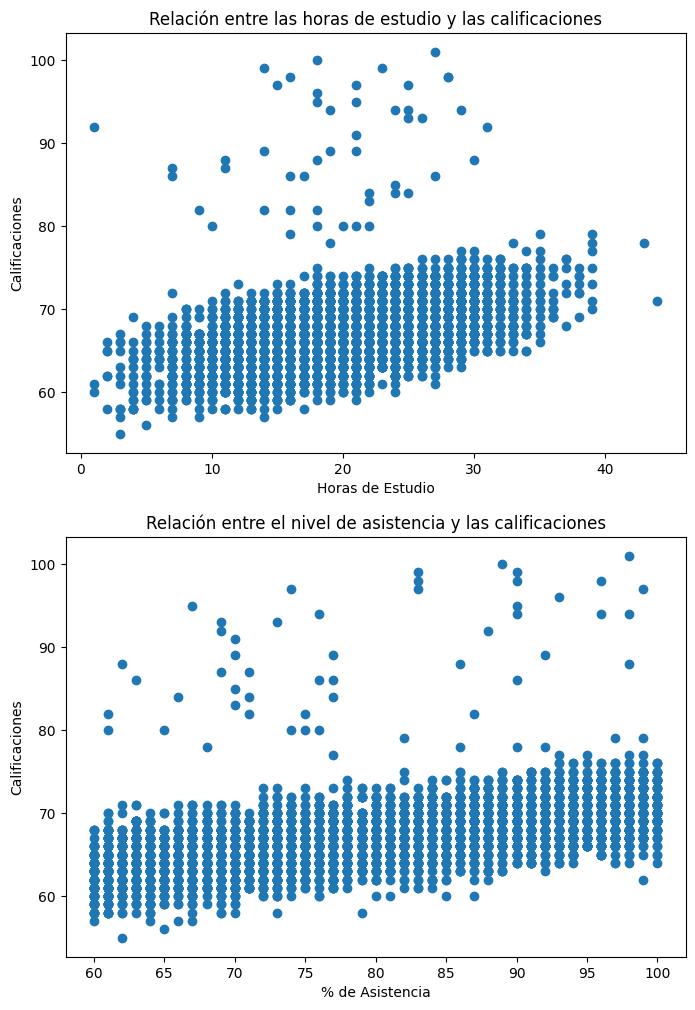

In [13]:
#Relación de las horas de estudio con respecto a las nota obtenidas

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes[0].scatter(df_DatosExamenes['Horas_Estudio'], df_DatosExamenes['Nota_Examen'])
axes[0].set_title('Relación entre las horas de estudio y las calificaciones')
axes[0].set_xlabel('Horas de Estudio')
axes[0].set_ylabel('Calificaciones')

axes[1].scatter(df_DatosExamenes['Asistencia'], df_DatosExamenes['Nota_Examen'])
axes[1].set_title('Relación entre el nivel de asistencia y las calificaciones')
axes[1].set_xlabel('% de Asistencia')
axes[1].set_ylabel('Calificaciones')





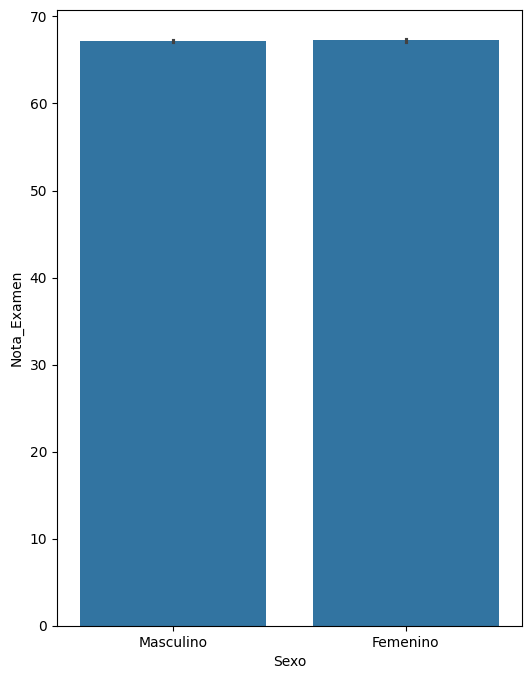

In [14]:
plt.figure(figsize=(6, 8))
sns.barplot()
ax = sns.barplot(x="Sexo", y="Nota_Examen", data=df_DatosExamenes)



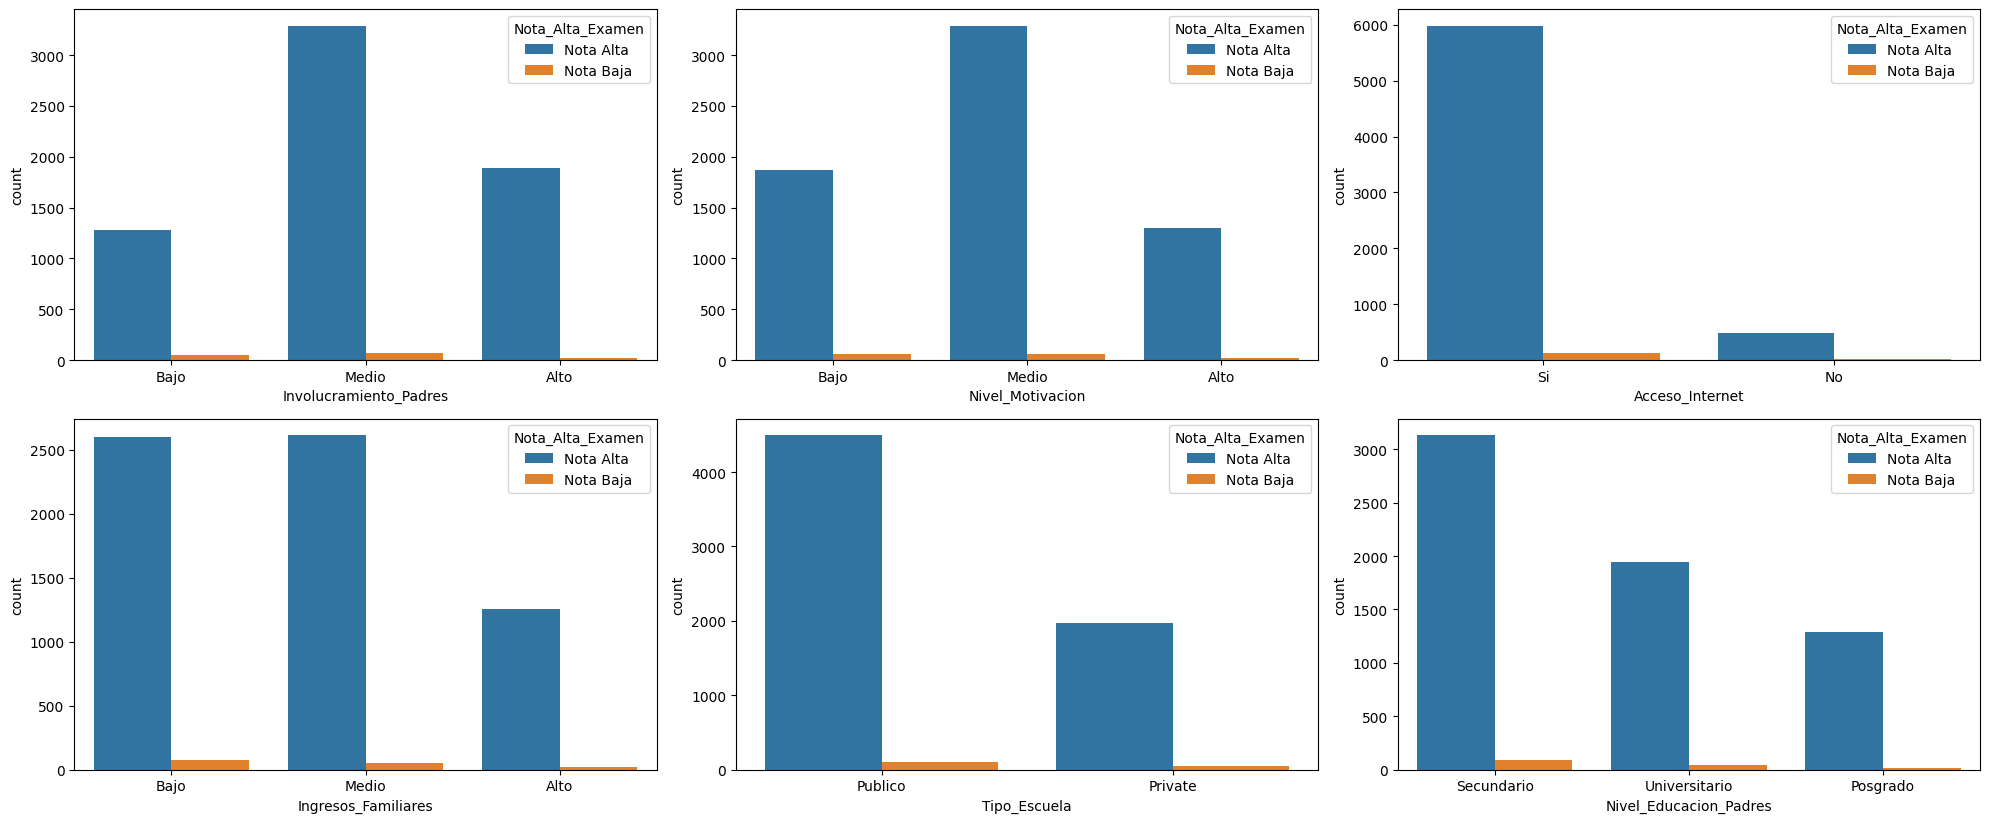

In [15]:
plt.figure(figsize=(20, 12))
data=df_DatosExamenes
plt.subplot(3, 3, 1)
sns.countplot(x='Involucramiento_Padres', data=data, hue='Nota_Alta_Examen' )
plt.subplot(3, 3, 2)
sns.countplot(x='Nivel_Motivacion', data=data, hue='Nota_Alta_Examen' )
plt.subplot(3, 3, 3)
sns.countplot(x='Acceso_Internet', data=data, hue='Nota_Alta_Examen'  )
plt.subplot(3, 3, 4)
sns.countplot(x='Ingresos_Familiares', data=data, hue='Nota_Alta_Examen'  )
plt.subplot(3, 3, 5)
sns.countplot(x='Tipo_Escuela', data=data, hue='Nota_Alta_Examen'  )
plt.subplot(3, 3, 6)
sns.countplot(x='Nivel_Educacion_Padres', data=data, hue='Nota_Alta_Examen'  )
plt.tight_layout()
plt.show()



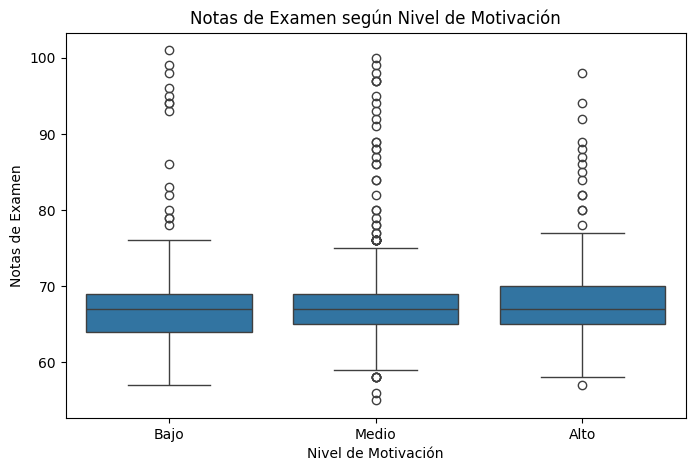

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Nivel_Motivacion', y='Nota_Examen', data=df_DatosExamenes)
plt.xlabel('Nivel de Motivación')
plt.ylabel('Notas de Examen')
plt.title('Notas de Examen según Nivel de Motivación')
plt.show()

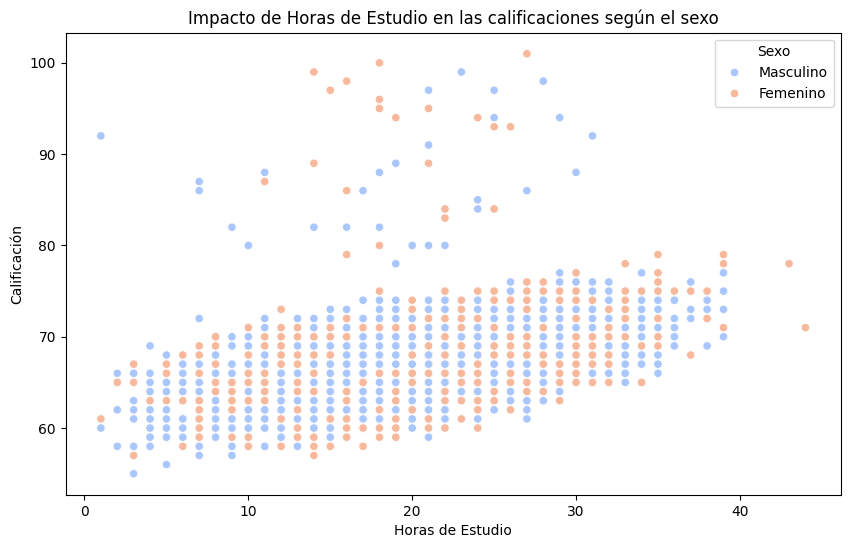

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horas_Estudio', y='Nota_Examen', data=data, hue='Sexo', palette='coolwarm')
plt.title('Impacto de Horas de Estudio en las calificaciones según el sexo')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación')
plt.show()